Modelo ajustado: y = 3.3056 + -2.2446x1 + 2.8970x2
Coeficiente de determinación (r²): 0.8687
Coeficiente de correlación (r): 93.21%


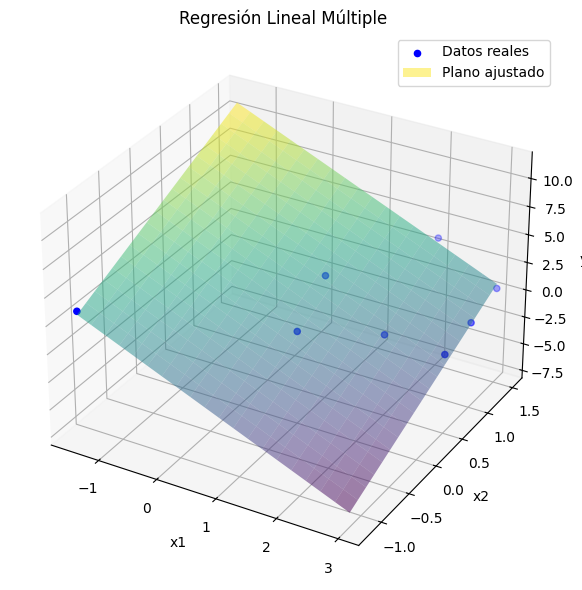

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Datos
x1 = np.array([1, 1, 2, 3, -1.5, 2, 3, 3])
x2 = np.array([0, 0.5, 0.5, 1, -1.2, 1.5, 1.5, 0.5])
y = np.array([0.2, 3, -0.8, -0.4, 3.5, 3.6, 0.5, -1])

n = len(y)
X = np.column_stack((np.ones(n), x1, x2))  # Matriz con columna de unos

# Mínimos cuadrados: a = (XᵗX)^-1 Xᵗy
coeffs = np.linalg.inv(X.T @ X) @ X.T @ y
a0, a1, a2 = coeffs

# Predicción
y_pred = a0 + a1 * x1 + a2 * x2

# Cálculo de r² y r
Sr = np.sum((y - y_pred)**2)
St = np.sum((y - np.mean(y))**2)
r2 = (St - Sr) / St
r = np.sqrt(r2) * 100  # Porcentaje

# Resultados
print(f"Modelo ajustado: y = {a0:.4f} + {a1:.4f}x1 + {a2:.4f}x2")
print(f"Coeficiente de determinación (r²): {r2:.4f}")
print(f"Coeficiente de correlación (r): {r:.2f}%")

# Graficar
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Puntos reales
ax.scatter(x1, x2, y, color='blue', label='Datos reales')

# Superficie ajustada
x1_grid, x2_grid = np.meshgrid(np.linspace(min(x1), max(x1), 20),
                               np.linspace(min(x2), max(x2), 20))
y_grid = a0 + a1*x1_grid + a2*x2_grid

ax.plot_surface(x1_grid, x2_grid, y_grid, alpha=0.5, cmap='viridis', label='Plano ajustado')

ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")
ax.set_title("Regresión Lineal Múltiple")
plt.legend()
plt.tight_layout()
plt.show()

